In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from matplotlib.patches import Circle
from scipy.spatial import distance
from astropy.stats import sigma_clipped_stats
from photutils import DAOStarFinder
from photutils import CircularAperture
import sys
sys.path.insert(1,'/home/karina/Dropbox/postdoc_EPFL/ANN/CNNstudentproject/CNN_200k/classification_mosaic/known_candidates/catalogs/')
import VI_def as vid

In [69]:
path = '/home/karina/Dropbox/postdoc_EPFL/ANN/CNNstudentproject/CNN_200k/classification_mosaic/eso_prop/'
path_fits = '/home/karina/Dropbox/postdoc_EPFL/ANN/CNNstudentproject/CNN_200k/candidates2/'

In [70]:
#df=pd.read_csv(path+'final_candidates.csv')
df=pd.read_csv(path+'final_candidates_coord_correction.csv')

In [1025]:
j=4

In [1026]:
im= fits.open(path_fits+df['file_name'].iloc[j])

mean, median, std = sigma_clipped_stats(im[0].data, sigma=3.0)
daofind = DAOStarFinder(fwhm=5.0, threshold=5.*std)
sources = daofind(im[0].data - median)

if sources == None:
    daofind = DAOStarFinder(fwhm=8.0, threshold=5.*std)
    sources = daofind(im[0].data - median)
if sources == None:
    print('fwhm=8')
    daofind = DAOStarFinder(fwhm=8.0, threshold=5.*std)
    sources = daofind(im[0].data - median)
if sources == None:
    print('Qtable')
    x = [0,15]
    y = [0,15]
    sources = QTable([x,y],names={'xcentroid','ycentroid'})
sources['difx'] = abs(sources['xcentroid']-26)
sources['dify'] = abs(sources['ycentroid']-24)
s = sources.to_pandas()
s['md'] = s[['difx','dify']].mean(axis=1)
s = s.sort_values(by=['md'])
s = s.reset_index()
s

/home/karina/miniconda3/envs/sim_lens/lib/python3.7/site-packages/astropy/table/table.py:2769: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


index  id  xcentroid  ycentroid  sharpness  roundness1  roundness2  npix  \
0      3   4  25.263989  25.812583   0.504632    0.015468    0.029195    49   
1      5   6  26.053617  34.181467   0.502164   -0.307894   -0.160700    49   
2      2   3  15.152249  21.919149   0.450000   -0.776727    0.834965    49   
3      1   2  32.654766  16.248256   0.561221    0.841456   -0.030961    49   
4      0   1  12.988998  12.512378   0.591124    0.260800   -0.107237    49   
5      4   5  11.006674  34.118198   0.652217   -0.059401   -0.245190    49   

   sky       peak      flux       mag       difx       dify         md  
0  0.0  52.285423  3.459747 -1.347611   0.736011   1.812583   1.274297  
1  0.0  29.514584  2.131704 -0.821817   0.053617  10.181467   5.117542  
2  0.0  46.821800  2.861185 -1.141365  10.847751   2.080851   6.464301  
3  0.0  37.183472  2.171023 -0.841661   6.654766   7.751744   7.203255  
4  0.0  20.690514  1.519850 -0.454502  13.011002  11.487622  12.249312  
5  0.0  24.860157  1.745041 -0.604514  14.993326  10.118198  12.555762

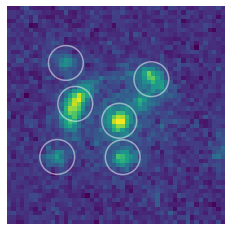

In [1027]:
positions = np.transpose((s['xcentroid'], s['ycentroid']))
apertures = CircularAperture(positions, r=4.)
plt.imshow(im[0].data)
apertures.plot(color='white', lw=1.5, alpha=0.5)
#s['xcentroid'][1], s['ycentroid'][1]
a=plt.axis('off')

In [1028]:
if (len(s)>1) and (s['md'][0]<3):
    print('d1',s['xcentroid'].values[1],s['ycentroid'].values[1])
    dst=distance.euclidean((25,25),(s['xcentroid'].values[1],s['ycentroid'].values[1]))
    print(dst)
    if (len(s)==2) and (s['md'][1]>12):
        print('d2')
        dst=distance.euclidean((25,25),(s['xcentroid'].values[0],s['ycentroid'].values[0]))   
else:
    daofind = DAOStarFinder(fwhm=8.0, threshold=5.*std)
    sources = daofind(im[0].data - median)
    sources['difx'] = abs(sources['xcentroid']-26)
    sources['dify'] = abs(sources['ycentroid']-24)
    s = sources.to_pandas()
    s['md'] = s[['difx','dify']].mean(axis=1)
    s = s.sort_values(by=['md'])
    s = s.reset_index()
    if (len(s)<1):
        print('d4')
        dst=distance.euclidean((25,25),(s['xcentroid'].values[0],s['ycentroid'].values[0]))
        if (s['md'][1]>8):
            dst=distance.euclidean((25,25),(s['xcentroid'].values[0],s['ycentroid'].values[0]))
        else:
            print('d5')
            dst=distance.euclidean((25,25),(s['xcentroid'].values[1],s['ycentroid'].values[1]))
dst,dst*0.27,(len(s)==2),(s['md'][1]>12)

d1 26.05361671787078 34.18146698571091
9.241723010233331


(9.241723010233331, 2.4952652127629995, False, False)

'/home/karina/Dropbox/postdoc_EPFL/ANN/CNNstudentproject/CNN_200k/classification_mosaic/eso_prop/mask_v2.csv'

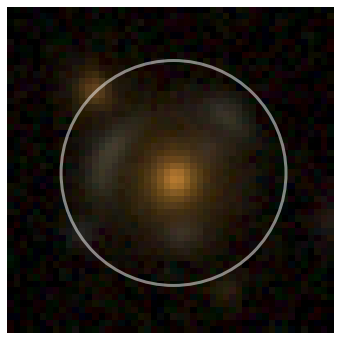

In [1030]:
#xc = red['ra'].values
#px1=abs((blue['ra'].values-red['ra'].values)*3600/0.27 + 25)
#py1=abs((blue['dec'].values-red['dec'].values)*3600/0.27 + 25)
#px1,py1

fig, ax = plt.subplots(figsize=(6, 6))
circle = Circle((25,25), dst+8,facecolor='none',edgecolor='white', linewidth=3, alpha=0.5)
ax.add_patch(circle)

#c1 = Circle((s['xcentroid'].values[0],s['ycentroid'].values[0]), 3,facecolor='none',edgecolor='white', linewidth=3, alpha=0.5)
#ax.add_patch(c1)

#c2 = Circle((s['xcentroid'].values[1],s['ycentroid'].values[1]), 3,facecolor='none',edgecolor='white', linewidth=3, alpha=0.5)
#ax.add_patch(c2)


im= fits.open(path_fits+df['file_name'].iloc[j])
G,R,I = im[0].data,im[1].data,im[2].data
color_img = vid.showplot_rgb(I,R,G)
ci = color_img#np.fliplr(color_img) 
im = plt.imshow(ci)
a=plt.axis('off')

In [952]:
type(sources)
sources

<Table length=2>
  id      xcentroid      ...        difx               dify       
int64      float64       ...      float64            float64      
----- ------------------ ... ------------------ ------------------
    1 16.449189040123443 ...  9.550810959876557 3.4735035587675043
    2 20.278972644509746 ... 5.7210273554902535 13.889813762668133

In [950]:
df[df['class_fVI_1']=='L']

Unnamed: 0  col1_1  col1_1a          ra        dec      id_1  \
0            0       0        0    3.928313 -46.603047   1873198   
1            1       1        1   15.366041 -33.722010   2425798   
2            2       2        2   27.972236 -14.806869   5954243   
3            3       3        3   20.175973 -51.731411   6788344   
4            4       4        4   58.176701 -38.429152  12670631   
..         ...     ...      ...         ...        ...       ...   
76          78      78       78   77.695997 -26.539526  17103670   
77          79      79       79  340.589927   0.195764  23998704   
78          80      80       80  318.179744   0.155773  20906435   
79          81      81       81    9.593161 -25.842242    688991   
80          82      82       82   73.470734 -50.376374  17856142   

                                                names  \
0                                       DESJ0015-4636   
1   IACJ010127.83-334319.6 / DESJ0101-3343 / LinKS...   
2                               DESI-027.9723-14.8069   
3                                       DESJ0120-5143   
4                                       DESJ0352-3825   
..                                                ...   
76                               DESI-77.6960-26.5395   
77                                      224221+001144   
78                                      DESJ2112+0009   
79                                      DESJ0038-2550   
80                                                NaN   

                                        references        comments  \
0                                      Jacobs2019b             NaN   
1      Bettinelli2016 / Jacobs2019b / Petrillo2019  confirmed lens   
2                                        Huang2020             NaN   
3               Diehl2017 / Jacobs2019b / Nord2020  confirmed lens   
4                                      Jacobs2019b             NaN   
..                                             ...             ...   
76                                       Huang2021             NaN   
77  Sonnenfeld2018-SuGOHI-I / Jaelani2020-SuGOHI-V             NaN   
78                                     Jacobs2019b             NaN   
79                       Jacobs2019a / Jacobs2019b             NaN   
80                                             NaN             new   

   class_fVI_1  ...     per_F    per_NL      mean  sum    SL_per  class_fVI_2  \
0            L  ...  0.000000  0.000000  3.000000   21  1.000000            L   
1            L  ...  0.000000  0.000000  3.000000   21  1.000000            L   
2            L  ...  0.000000  0.000000  3.000000   21  1.000000            L   
3            L  ...  0.000000  0.000000  3.000000   21  1.000000            L   
4            L  ...  0.000000  0.000000  3.000000   21  1.000000            L   
..         ...  ...       ...       ...       ...  ...       ...          ...   
76           L  ...  0.142857  0.428571  1.285714    9  0.428571            L   
77           L  ...  0.000000  0.571429  1.142857    8  0.428571            L   
78           L  ...  0.000000  0.571429  1.000000    7  0.428571            L   
79           L  ...  0.000000  0.571429  0.857143    6  0.428571            L   
80           L  ...  0.000000  0.714286  0.714286    5  0.285714            L   

    subclass_fVI  comments_fVI     g-i     g-r  
0           None           NaN  2.0101  1.3587  
1           None           NaN  1.8416  1.0854  
2           None           NaN  2.5781  1.3673  
3           None           NaN  2.1448  1.3763  
4           None           NaN  2.0593  1.3772  
..           ...           ...     ...     ...  
76          None           NaN  1.8424  1.0316  
77          None           NaN  2.2979  1.6887  
78          None           NaN  2.1558  1.5684  
79          None           NaN  2.1802  1.4190  
80          None           NaN  1.9655  1.4265  

[81 rows x 73 columns]

0.09550020409344373


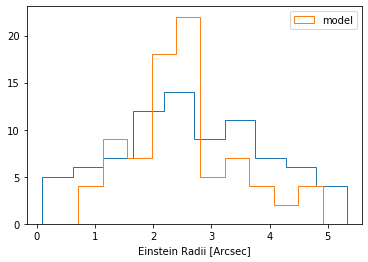

In [1054]:
dfmask=pd.read_csv(path+'mask_v2.csv')
dfmask['dst_arcsec']
plt.hist(dfmask['dst_arcsec'],histtype='step')
plt.xlabel('Einstein Radii [Arcsec]')
print(dfmask['dst_arcsec'].min())

dfmodel = pd.read_csv('/home/karina/Dropbox/postdoc_EPFL/Model/Mask/full_results.csv')

plt.hist(dfmodel['SIE_lens'][1:83].astype(float),histtype='step',label='model')
plt.legend(numpoints=1)
plt.savefig(path+'te_distribution.png')

In [946]:
#dst=distance.euclidean((s['xcentroid'].values[0],s['ycentroid'].values[0]),(s['xcentroid'].values[1],s['ycentroid'].values[1]))
if (len(s)>1) or (s['md'][0]<3):
    dst=distance.euclidean((25,25),(s['xcentroid'].values[1],s['ycentroid'].values[1]))
    if (len(s)==2) and (s['md'][1]>12):
        print(2)
        dst=distance.euclidean((25,25),(s['xcentroid'].values[0],s['ycentroid'].values[0]))   
else:
    print(0)
    daofind = DAOStarFinder(fwhm=8.0, threshold=5.*std)
    sources = daofind(im[0].data - median)
    sources['difx'] = abs(sources['xcentroid']-26)
    sources['dify'] = abs(sources['ycentroid']-24)
    s = sources.to_pandas()
    s['md'] = s[['difx','dify']].mean(axis=1)
    s = s.sort_values(by=['md'])
    s = s.reset_index()
    print(s)
    dst=distance.euclidean((25,25),(s['xcentroid'].values[1],s['ycentroid'].values[1]))
    if s['md'][1]>3:
        dst=distance.euclidean((25,25),(s['xcentroid'].values[0],s['ycentroid'].values[0]))
dst,dst*0.27,(len(s)==2),(s['md'][1]>12)

(13.727177354706106, 3.706337885770649, True, False)